# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [3]:
!rm -r '/content/Traffic_Signs'

rm: cannot remove '/content/Traffic_Signs': No such file or directory


In [4]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open Traffic_Signs.zip, Traffic_Signs.zip.zip or Traffic_Signs.zip.ZIP.


In [5]:
# !rm -r '/content/Traffic_Signs'

In [6]:
# !wget --no-check-certificate 'https://drive.google.com/uc?id=1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ' -O Traffic_Signs.zip

In [7]:
# !apt-get install p7zip-full

In [8]:
# !7z x Traffic_Signs.zip -oTraffic_Signs

In [9]:
# import zipfile
# import os

# zip_file_path = '/content/Traffic_Signs.zip'
# extract_folder = 'Traffic_Signs'      # Folder to extract to


# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_folder)

# print(f'Files extracted to: {extract_folder}')

In [10]:
!unzip '/content/drive/MyDrive/Dataset/Traffic_Signs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Traffic_Signs/Dataset/14/00014_00021_00023.png  
  inflating: __MACOSX/Traffic_Signs/Dataset/14/._00014_00021_00023.png  
  inflating: Traffic_Signs/Dataset/14/00014_00012_00025.png  
  inflating: __MACOSX/Traffic_Signs/Dataset/14/._00014_00012_00025.png  
  inflating: Traffic_Signs/Dataset/14/00014_00003_00002.png  
  inflating: __MACOSX/Traffic_Signs/Dataset/14/._00014_00003_00002.png  
  inflating: Traffic_Signs/Dataset/14/00014_00003_00016.png  
  inflating: __MACOSX/Traffic_Signs/Dataset/14/._00014_00003_00016.png  
  inflating: Traffic_Signs/Dataset/14/00014_00012_00019.png  
  inflating: __MACOSX/Traffic_Signs/Dataset/14/._00014_00012_00019.png  
  inflating: Traffic_Signs/Dataset/14/00014_00012_00018.png  
  inflating: __MACOSX/Traffic_Signs/Dataset/14/._00014_00012_00018.png  
  inflating: Traffic_Signs/Dataset/14/00014_00003_00017.png  
  inflating: __MACOSX/Traffic_Signs/Dataset/14/._00014_00003_00017.png  
  in

## Import Libraries

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import keras
from keras import layers
from tensorflow import data as tf_data
import cv2
from os import listdir
from os.path import isfile, join
from pathlib import Path
import argparse




## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [12]:
image_size = (180, 180)
batch_size = 32

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/Traffic_Signs/Dataset",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Using 7841 files for validation.


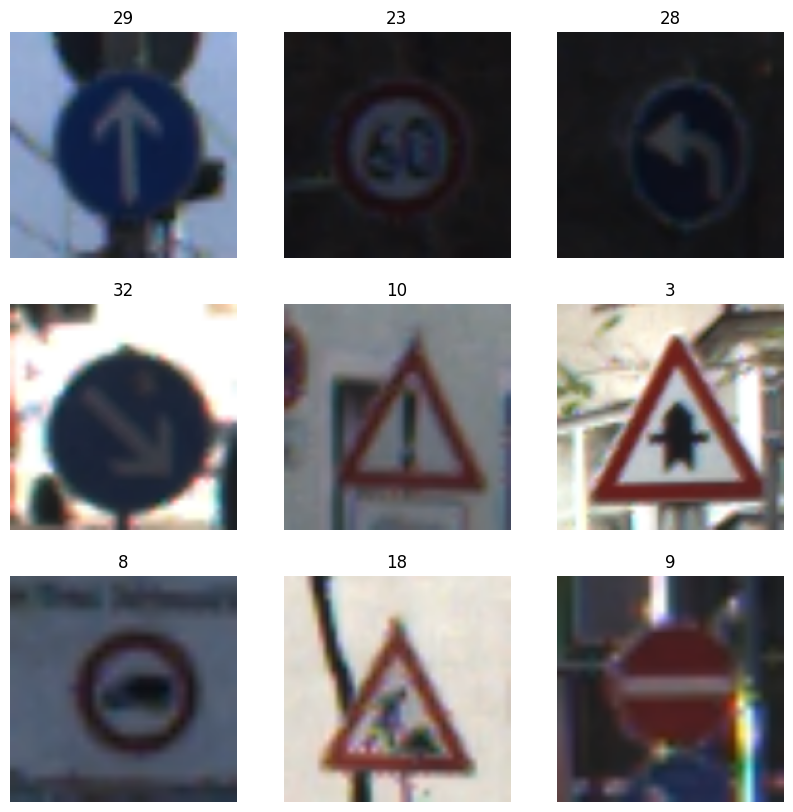

In [13]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [14]:
main_folder = "/content/Traffic_Signs/Dataset"

for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)

    if os.path.isdir(subfolder_path):

        for image_name in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_name)

            img = cv2.imread(image_path)

            print(f"Original Image: {image_name}")
            print('Width:', img.shape[1])
            print('Height:', img.shape[0])

            resized_img = cv2.resize(img, (200, 200))






Streaming output truncated to the last 5000 lines.
Width: 85
Height: 85
Original Image: 00035_00012_00003.png
Width: 34
Height: 35
Original Image: 00035_00006_00026.png
Width: 81
Height: 82
Original Image: 00035_00000_00023.png
Width: 75
Height: 76
Original Image: 00035_00000_00013.png
Width: 47
Height: 49
Original Image: 00035_00038_00016.png
Width: 37
Height: 37
Original Image: 00035_00019_00002.png
Width: 27
Height: 29
Original Image: 00035_00035_00027.png
Width: 67
Height: 64
Original Image: 00035_00027_00006.png
Width: 32
Height: 32
Original Image: 00035_00015_00000.png
Width: 29
Height: 29
Original Image: 00035_00003_00004.png
Width: 27
Height: 27
Original Image: 00035_00012_00005.png
Width: 34
Height: 36
Original Image: 00035_00013_00000.png
Width: 25
Height: 26
Original Image: 00035_00000_00027.png
Width: 99
Height: 105
Original Image: 00035_00031_00000.png
Width: 26
Height: 26
Original Image: 00035_00028_00025.png
Width: 55
Height: 53
Original Image: 00035_00001_00012.png
Widt

In [15]:
import numpy as np

normalized_image = resized_img / 255.0

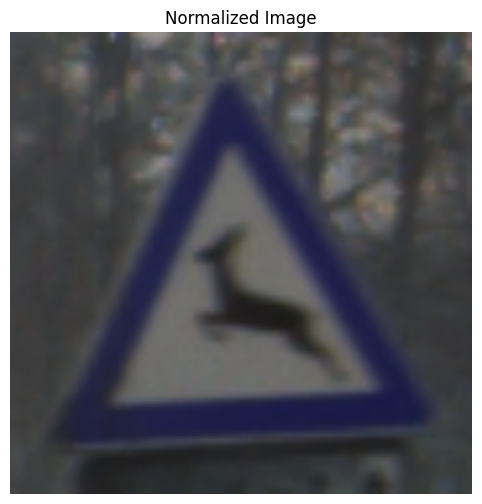

In [16]:
plt.figure(figsize=(8, 6))
plt.imshow(normalized_image)
plt.axis('off')
plt.title('Normalized Image')
plt.show()

In [17]:
df = pd.read_csv("/content/Traffic_Signs/Dataset_MetaData.csv")
df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Dataset/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Dataset/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Dataset/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Dataset/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Dataset/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Dataset/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Dataset/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Dataset/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Dataset/42/00042_00007_00028.png


In [18]:
df.shape

(39209, 8)

In [19]:
df.sample(7)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
11391,64,64,6,6,59,59,7,Dataset/7/00007_00022_00021.png
28230,54,63,6,6,49,58,24,Dataset/24/00024_00001_00000.png
8278,62,63,6,6,57,58,4,Dataset/4/00004_00060_00028.png
16806,35,35,6,6,30,30,10,Dataset/10/00010_00059_00006.png
12650,43,43,5,5,38,38,8,Dataset/8/00008_00016_00020.png
23656,49,49,6,6,44,44,15,Dataset/15/00015_00008_00016.png
31129,75,70,6,7,69,64,28,Dataset/28/00028_00010_00019.png


In [20]:
df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [21]:
df.isna().sum()

,0
Width,0
Height,0
Roi.X1,0
Roi.Y1,0
Roi.X2,0
Roi.Y2,0
ClassId,0
Path,0


In [22]:
columns = df[['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2','Roi.Y2']]
corre = columns.corr()
corre

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2
Width,1.000000,0.981240,0.859006,0.823783,0.999558,0.980748
Height,0.981240,1.000000,0.828014,0.845188,0.981451,0.999548
Roi.X1,0.859006,0.828014,1.000000,0.844565,0.849017,0.818147
Roi.Y1,0.823783,0.845188,0.844565,1.000000,0.814345,0.834700
Roi.X2,0.999558,0.981451,0.849017,0.814345,1.000000,0.981656
Roi.Y2,0.980748,0.999548,0.818147,0.834700,0.981656,1.000000


## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [24]:
df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Dataset/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Dataset/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Dataset/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Dataset/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Dataset/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Dataset/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Dataset/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Dataset/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Dataset/42/00042_00007_00028.png


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split


X = df.drop('Path', axis=1)
y = df['Path']


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

print("Training set size:", X_train.shape[0])  # 70
print("Validation set size:", X_val.shape[0])  # 15
print("Test set size:", X_test.shape[0])       # 15

Training set size: 27444
Validation set size: 5883
Test set size: 5882


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [26]:
from tensorflow.keras import layers, models

In [39]:
def build_cnn_model(image_size):
    model = models.Sequential()
    num_classes = 43
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [40]:
cnn_model = build_cnn_model(image_size)


cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [41]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,652,523 (25.38 MB)

 Trainable params: 6,652,523 (25.38 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [ ]:

model = build_cnn_model(image_size)


history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=10)


Epoch 1/10
 22/981 ━━━━━━━━━━━━━━━━━━━━ 38:23 2s/step - accuracy: 0.0182 - loss: 285.7795

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [ ]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(model, img_path):
    processed_image = load_and_preprocess_image(img_path)
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

## Save the Model
Save the trained CNN model for submission.

In [ ]:
model.save("trafficـmodel.h5")
print("Model saved as trafficـmodel.h5")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: